In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns
sns.set()
plt.rcParams["figure.figsize"] = (20,10)

Let's say ~~you think~~ you're a genius.
- You have $100 starting capital.
- You can always find bets with 60/40 % chance of doubling/halving (+100%/-50%).

This is great, but there's a catch: you are poor af. You just want to escape poverty, so you know you will YOLO 60%+ of your capital on each bet.

**Should you start trading? 
The answer is No.** Life is not a coin flip.

As long as you bet (>60%) more than your odds (60%), you will lose everything.

This is a mathematical fact via the [Kelly Criterion](https://en.wikipedia.org/wiki/Kelly_criterion).
But it's an extremely unintuitive concept. So, below are 1000 (Monte Carlo) simulations that demonstrate the certainty.

---

Most traders find out they're [highly regarded](https://www.reddit.com/r/wallstreetbets/comments/wtxwen/highly_regarded/) when it's too late. They go on losing streaks and the leverage only accelerate on the urge to make back the money.

> Your grandmother does not analyze smoking as a single-period event, but as an activity of smoking. Risk-taking (trading) is an activity, not a single event.

*- [Nassim Taleb](https://www.youtube.com/watch?v=91IOwS0gf3g).*

## All roads lead to financial ruin.
1000 simulations with the above conditions

In [2]:
%%capture
num_simulations = 1000
max_num_bets = 1000
win_probability = []
end_balance = []
kelly_bets = [[.61,.6]]
def random_num(chance_of_winning=.5):
    chance_of_winning = chance_of_winning * 100
    num = random.randint(1, 100)
    if num <= chance_of_winning:
        same_num = True
    else:
        same_num = False
    return same_num

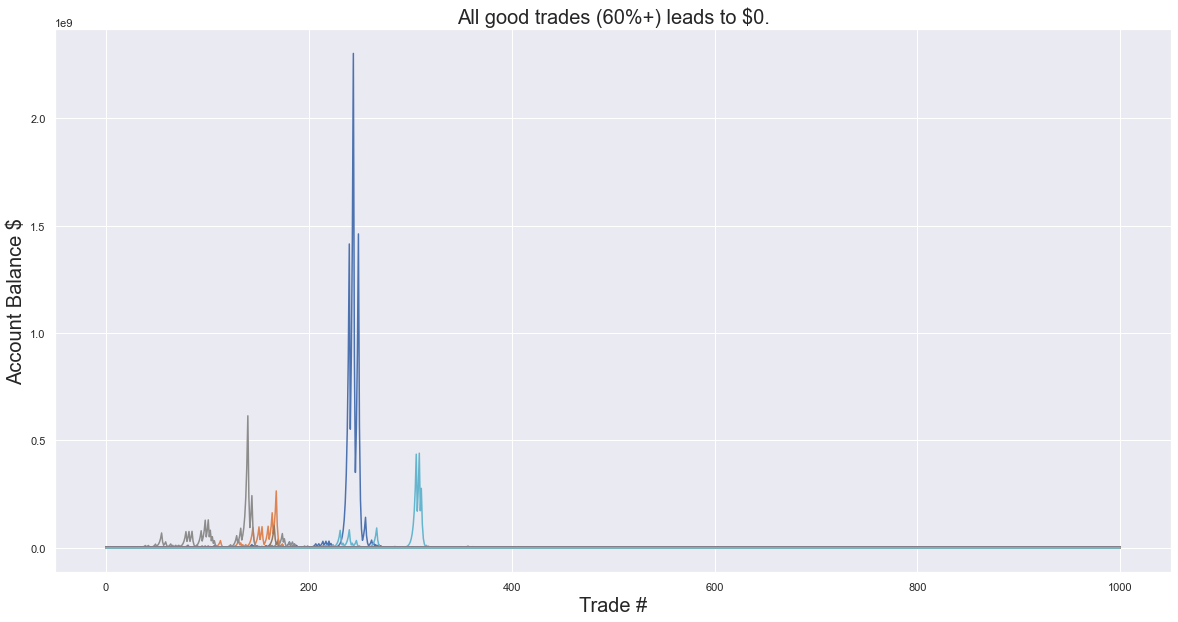

In [3]:
list_overall_end_balance = []

for n, x in enumerate(kelly_bets):
    win_probability = []
    end_balance = []
    for i in range(num_simulations):
        bet = x[0]
        chance_of_winning = x[1]
        balance = [100]
        num_bets = [0]
        num_wins = 0
        while num_bets[-1] < max_num_bets:
            same = random_num(chance_of_winning)
            if same:
                balance.append(balance[-1] * (1+bet))
                num_wins += 1
            else:
                balance.append(balance[-1] * (1-bet))
            num_bets.append(num_bets[-1] + 1)
        win_probability.append(num_wins/num_bets[-1])
        end_balance.append(balance[-1])    
        plt.title("All good trades (60%+) leads to $0.", fontsize=20)
        plt.xlabel("Trade #", fontsize=20)
        plt.ylabel("Account Balance $", fontsize=20)
        plt.plot(num_bets, balance)
    overall_end_balance = sum(end_balance)/len(end_balance)
    list_overall_end_balance.append(overall_end_balance)
    plt.show()

In [4]:
average_end_balance = sum(end_balance)/len(end_balance)
print("highest end balance: ${:.2e} (${:.100f})".format(max(end_balance), max(end_balance)))
print("lowest end balance: ${:.2e} (${:.100f})".format(min(end_balance), min(end_balance)))
print("average end balance: ${:.2e} (${:.100f})".format(average_end_balance, average_end_balance))
print("all cases: financially irrecoverable.")

highest end balance: $7.02e-10 ($0.0000000007020803271948798315132758323449824883200065528399136383086442947387695312500000000000000000)
lowest end balance: $7.69e-71 ($0.0000000000000000000000000000000000000000000000000000000000000000000000769167937318915647272310498921)
average end balance: $7.88e-13 ($0.0000000000007875125041409818356167967033067249537931636682586145070672500878572463989257812500000000)
all cases: financially irrecoverable.


In [13]:
# print("plot: all 1000 end balances")
# plt.plot(np.arange(0,len(end_balance)),end_balance)

## The optimal bet

What's the optimal bet for 60% odds? Much smaller than you probably guessed. ([wiki](https://en.wikipedia.org/wiki/Kelly_criterion))
![kelly criterion formula](kelly-criterion-formula.svg) 

- f = the fraction of the current bankroll to wager.
- p = the probability of a win.
- q = the probability of a loss | q = 1-p
- b = the proportion of the bet gained with a win

f = 60% - (40%/100%) = 20%
**The optimal bet is 20% of bankroll.**

1000 simulations, using 20% of bankroll. (Instead of 61%.)

![kelly-criterion-visualized.jpg](kelly-criterion-visualized.jpg)

In [7]:
%%capture
num_simulations = 1000
max_num_bets = 1000
win_probability = []
end_balance = []
kelly_bets = [[.2,.6]]

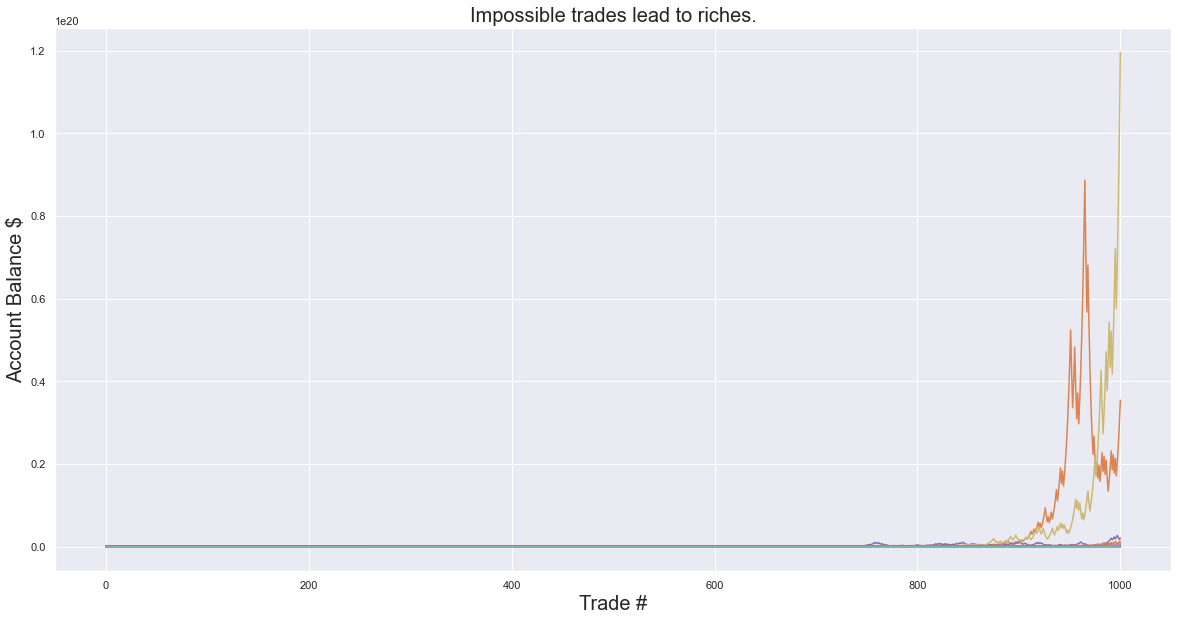

In [14]:
list_overall_win_probability = []
list_overall_end_balance = []

for n, x in enumerate(kelly_bets):
    win_probability = []
    end_balance = []
    for i in range(num_simulations):
        bet = x[0]
        chance_of_winning = x[1]
        balance = [100]
        num_bets = [0]
        num_wins = 0
        while num_bets[-1] < max_num_bets:
            same = random_num(chance_of_winning)
            if same:
                balance.append(balance[-1] * (1+bet))
                num_wins += 1
            else:
                balance.append(balance[-1] * (1-bet))    
            num_bets.append(num_bets[-1] + 1)
        win_probability.append(num_wins/num_bets[-1])
        end_balance.append(balance[-1])    
        plt.title("Impossible trades lead to riches.", fontsize=20)
        plt.xlabel("Trade #", fontsize=20)
        plt.ylabel("Account Balance $", fontsize=20)
        plt.plot(num_bets, balance)
    overall_end_balance = sum(end_balance)/len(end_balance)
    list_overall_end_balance.append(overall_end_balance)
    plt.show()

In [15]:
average_end_balance = sum(end_balance)/len(end_balance)
print("highest end balance: ${:.2e} (${:.0f})".format(max(end_balance), max(end_balance)))
print("lowest end balance: ${:.2e} (${:.0f})".format(min(end_balance), min(end_balance)))
print("average end balance: ${:.2e} (${:.0f})".format(average_end_balance, average_end_balance))

highest end balance: $1.20e+20 ($119558141466334396416)
lowest end balance: $2.58e+01 ($26)
average end balance: $1.63e+17 ($163425299699914336)


**all cases: impossible.** You're not gonna find a 60% odd bet consistently in an unknowable future, my guy.